IMPORTING LIBRARIES:

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

LOADING THE DATASET:

In [2]:
df = pd.read_csv("creditcard.csv")

PRINTING THE MISSING VALUES:

In [3]:
print("Missing values in dataset:\n", df.isnull().sum())

Missing values in dataset:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


REMOVING DUPLICATE VALUES:

In [4]:
df.drop_duplicates(inplace=True)

DETECTING AND REMOVING OUTLINERS USING INTERQUARTILE RANGE METHOD:

In [5]:
Q1 = df["Amount"].quantile(0.25)
Q3 = df["Amount"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["Amount"] >= lower_bound) & (df["Amount"] <= upper_bound)]

VISUALISING THE DISTRIBUTION OF FRAUD(1) AND LEGITIMATE TRANSACTIONS(0) USING A COUNTPLOT FROM SEABORN LIBRARY:

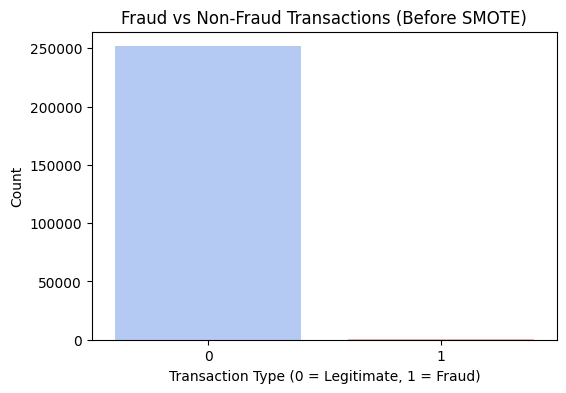

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df, hue="Class", palette="coolwarm", legend=False)
plt.title("Fraud vs Non-Fraud Transactions (Before SMOTE)")
plt.xlabel("Transaction Type (0 = Legitimate, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

SEPERATE FEATURES (x) AND TARGET VARIABLE (y) FROM THE DATASET:

In [7]:
X = df.drop(columns=["Class"])
y = df["Class"]

STANDARDISING THE FEATURE VALUE IN X USING STANDARDSCALER:

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

HANDLING IMBALANCED DATA USING SMOTE (Synthetic Minority Over-sampling Technique):

In [9]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

VISUALISING THE DISTRIBUTION AFTER APPLYING SMOTE:

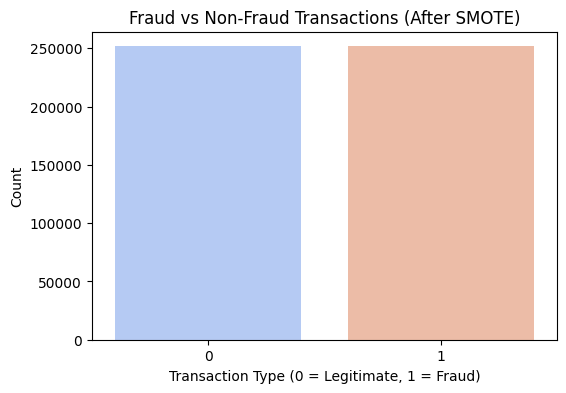

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=pd.DataFrame({"Class": y_resampled}), hue="Class", palette="coolwarm", legend=False)
plt.title("Fraud vs Non-Fraud Transactions (After SMOTE)")
plt.xlabel("Transaction Type (0 = Legitimate, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

SPLITING THE DATASET INTO TRAINING AND TESTING SETS:

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

VISUALIZING THE FEATURE IMPORTANCE OF A TRAINED MODEL USING A BAR CHART:

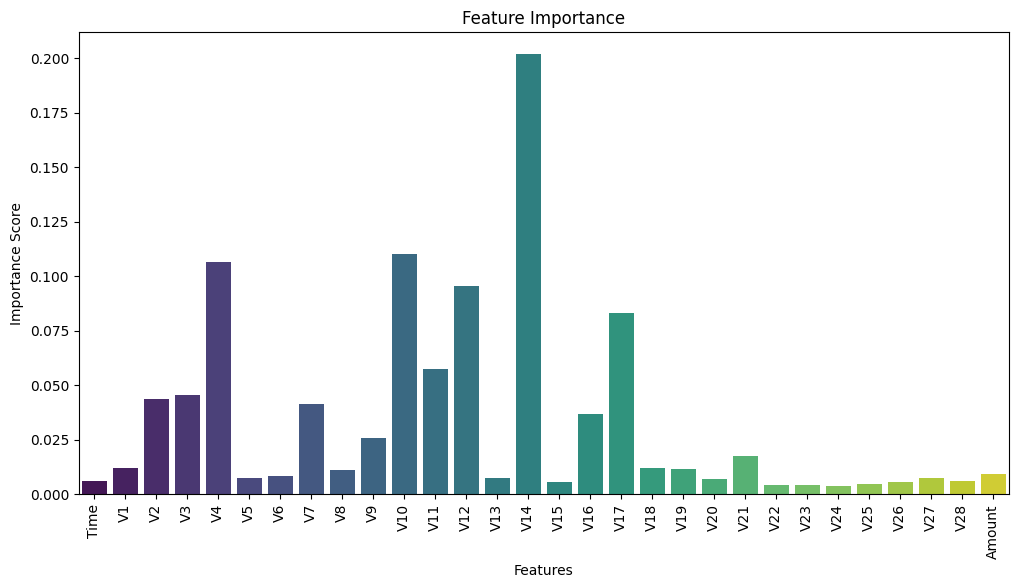

In [13]:
feature_importances = model.feature_importances_
plt.figure(figsize=(12,6))
sns.barplot(x=X.columns, y=feature_importances, palette="viridis", hue=X.columns, legend=False)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

CREATING A CONFUSION MATRIX TO EVALUATE THE PERFORMANCE OF A CLASSIFICATION MODEL:

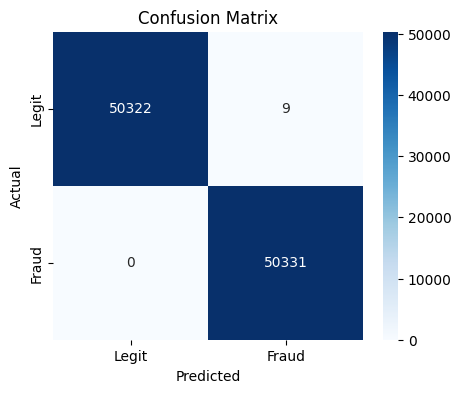

In [14]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

 COMPUTING THE ROC CURVE AND AUC SCORE:

In [15]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

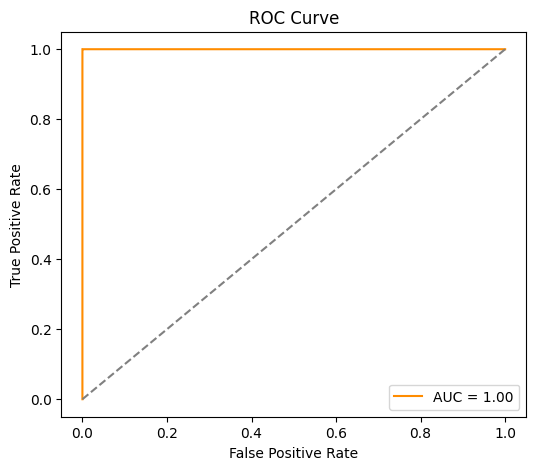

In [16]:
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

PRINTING THE CLASSIFICATION REPORT:

In [17]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50331
           1       1.00      1.00      1.00     50331

    accuracy                           1.00    100662
   macro avg       1.00      1.00      1.00    100662
weighted avg       1.00      1.00      1.00    100662



CALCULATING AND PRINTING THE ACCURACY OF MODEL:

In [18]:
from sklearn.metrics import accuracy_score

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 99.99%


LOGISTIC REGRESSION MODEL:

Logistic Regression Model Accuracy: 99.90%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50325
           1       0.89      0.46      0.61        84

    accuracy                           1.00     50409
   macro avg       0.94      0.73      0.80     50409
weighted avg       1.00      1.00      1.00     50409



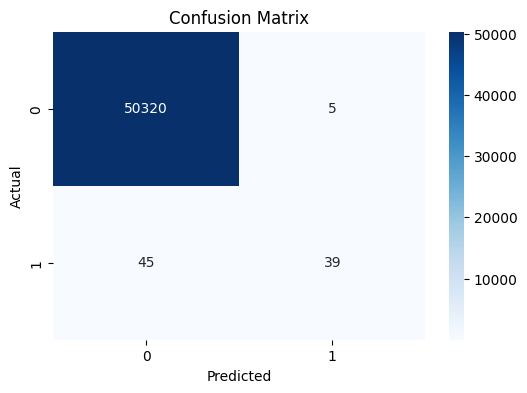

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split dataset into train and test sets (assuming X, y are defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy:.2%}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [20]:
!pip install xgboost


XGBoost CLASSIFIER:

C:\Users\aksha\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:09:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 99.83%
XGBoost AUC Score: 0.50


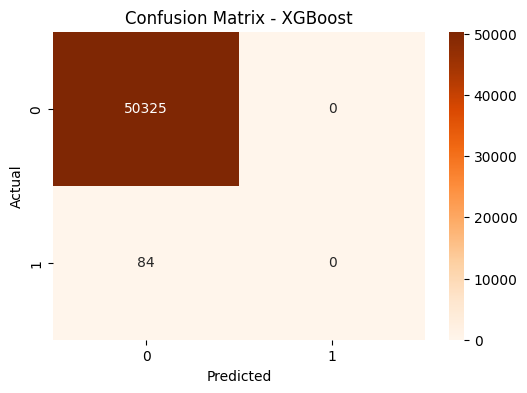

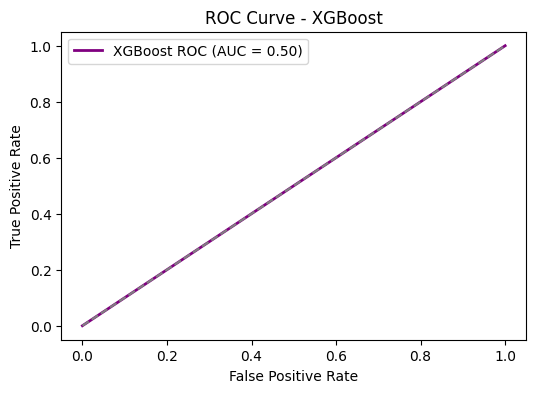

In [21]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

# Train XGBoost Model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions for XGBoost
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Model Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb:.2%}")
print(f"XGBoost AUC Score: {roc_auc_xgb:.2f}")

# **Confusion Matrix for XGBoost**
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **ROC Curve for XGBoost**
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, color="purple", lw=2, label=f"XGBoost ROC (AUC = {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()


In [22]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# --- Predict a Random Sample Transaction (Legit or Fraud) using Random Forest ---
sample_data = X.sample(1, random_state=15)  # Pick one sample transaction
sample_scaled = scaler.transform(sample_data)  # Scale it using the same scaler
sample_pred = model_rf.predict(sample_scaled)
sample_pred_proba = model_rf.predict_proba(sample_scaled)

print("\n--- Sample Transaction ---")
print(sample_data)

print("\nPrediction (Random Forest):")
print("Fraud" if sample_pred[0] == 1 else "Legit")


--- Sample Transaction ---
            Time        V1        V2        V3        V4        V5        V6  \
155200  104778.0  2.013786 -1.803291 -1.936221 -1.763352 -0.015635  1.308726   

              V7        V8        V9  ...      V20       V21       V22  \
155200 -1.142054  0.112746 -0.324554  ... -0.01864  0.095521  0.548113   

             V23       V24      V25       V26       V27       V28  Amount  
155200  0.004524  3.045678  0.16189 -0.028802 -0.080854 -0.020888   176.5  

[1 rows x 30 columns]

Prediction (Random Forest):
Legit


C:\Users\aksha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\aksha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
